In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

### Data Cleaning

In [4]:
# Dropping unwanted columns

df1 = df.drop(['availability', 'society', 'area_type', 'balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
# Checking for null values

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
# Dropping the rows which has null values because the count of null value is less compared to total no of records

df1.dropna(inplace = True)

In [7]:
df1.reset_index(drop=True, inplace = True)

In [8]:
# Checking the datatype of the columns

df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [9]:
# Checking the unique values in the each columns to find the noise values.

for i in df1[['location', 'size', 'total_sqft']]:
    print(i)
    print(df1[i].unique())
    print()

location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']

size
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']

total_sqft
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']



In [10]:
# Creating new column for the count of bedrooms

df1['bedroom'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))

In [11]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
# Checking for noise value in total_sqft column

df1[~df1['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
120,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
135,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
163,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
186,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
406,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
545,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
642,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
655,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
665,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
def convertrange_no(x):
    sqft = x.split('-')
    if len(sqft)==2:
        return (float(sqft[0])+ float(sqft[1]))/2
    try:
        return float(x)
    except:
        return None        

In [14]:
# Removing noise from the column 

df1['total_sqft'] = df1['total_sqft'].apply(convertrange_no)

In [15]:
df1.dropna(inplace=True)

In [16]:
df1.reset_index(drop=True, inplace=True)

In [17]:
df1.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
# Creating new dataframe with cleaned data

df2 = df1.copy()

In [19]:
# Calculating price per sqft and adding that as new column

df2['price_per_sqft'] = round((df2['price']*100000)/df2['total_sqft'])

In [20]:
df2['location'] = df2['location'].apply(lambda x : x.strip())

location_count = df2.groupby('location')['location'].count().sort_values(ascending=False)

In [21]:
location_with_lesser_count = location_count[location_count<10]

In [22]:
df2['location'] = df2['location'].apply(lambda x : 'other' if x in location_with_lesser_count else x)

In [23]:
df2['location'].nunique()

255

### Outlier Removal

In [24]:
# threshold for sqft per bedroom = 300

t = 300

df2[(df2['total_sqft']/df2['bedroom'])<300].head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36275.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10661.0
67,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.0
69,other,3 Bedroom,500.0,3.0,100.0,3,20000.0


In [25]:
df3 = df2[~((df2['total_sqft']/df2['bedroom'])<300)]

In [26]:
df3['price_per_sqft'].describe()

count     12456.000000
mean       6308.499759
std        4168.132109
min         268.000000
25%        4211.000000
50%        5294.000000
75%        6917.000000
max      176471.000000
Name: price_per_sqft, dtype: float64

In [27]:
def remove_outlier(df):
    final_df = pd.DataFrame()
    for x, y in df3.groupby('location'):
        mean_ = np.mean(y['price_per_sqft'])
        std = np.std(y['price_per_sqft'])
        after_removal = y[(y['price_per_sqft'] > (mean_ - std)) & (y['price_per_sqft'] < (mean_ + std))]
        final_df = pd.concat([final_df, after_removal], ignore_index=True) 
    return final_df
    
df4 = remove_outlier(df3)

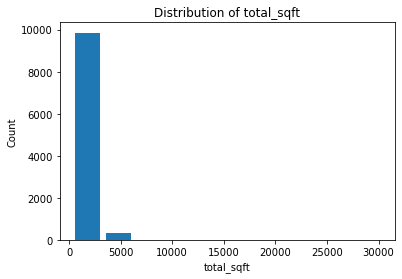

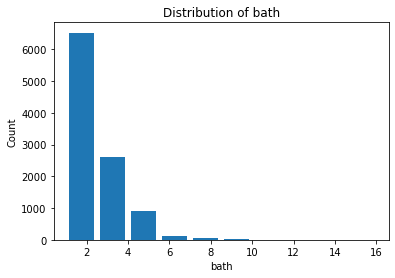

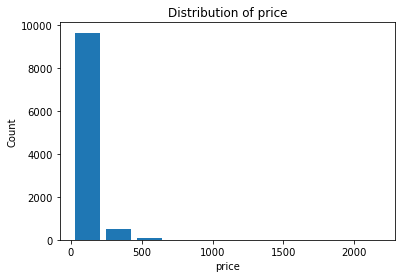

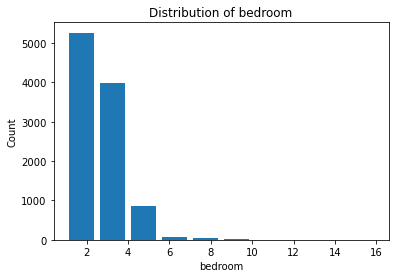

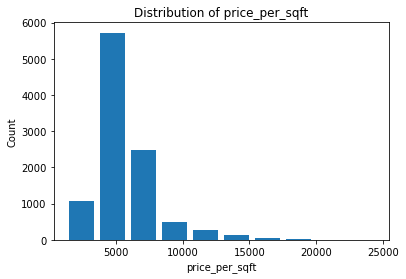

In [28]:
for i in df4[['total_sqft', 'bath', 'price', 'bedroom', 'price_per_sqft']]:
    plt.figure()
    plt.hist(df4[i], rwidth=0.8)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(i))

In [29]:
# if number of bathrooms higher than number of bedrooms, then replacing it with number of bedrooms

df4.loc[df4['bath']>df4['bedroom'], 'bath']=df4['bedroom']

In [30]:
df4.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15018.0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11902.0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11984.0


In [31]:
df4.shape

(10222, 7)

In [32]:
df5 = df4.drop(['size', 'price_per_sqft'], axis=1)
df5.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Encoding

In [33]:
dummies = pd.get_dummies(df5['location'])

In [34]:
df6 = pd.concat([df5.drop('location', axis=1), dummies.drop('other', axis=1)], axis=1)
df6.head()

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [35]:
x = df6.drop('price', axis=1)

In [36]:
y = df6['price']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)
lreg.score(X_test, Y_test)

0.8588270056550927

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87074502, 0.82806536, 0.79236396, 0.81306005, 0.76794302])

### Lasso

In [40]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, Y_train)
las.score(X_test, Y_test)

0.7054499634971889

In [41]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Lasso(), x, y, cv=cv)

array([0.72122534, 0.62248368, 0.66515274, 0.63223999, 0.65099975])

### Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
Dreg = DecisionTreeRegressor()
Dreg.fit(X_train, Y_train)
Dreg.score(X_test, Y_test)

0.748646178948891

In [43]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.68759064, 0.75323506, 0.56009216, 0.74305673, 0.6911436 ])

### Support Vector Machine 

In [44]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
svr.score(X_test, Y_test)

0.40785891336560354

In [45]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(SVR(), x, y, cv=cv)

array([0.36359044, 0.44847383, 0.60938212, 0.47189959, 0.42114735])

In [47]:
lreg.predict(X_test)

array([ 98.25136207,  38.62320253, 331.45214213, ..., 153.7896446 ,
       105.17919755, 144.96141818])

In [60]:
X_test.head(1)

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5086,1693.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
def price_predict(location, sqft, bath, bedroom):

    index_location = np.where( x.columns == location)[0][0]
    pi = np.zeros(len(x.columns))
    pi[0] = sqft
    pi[1] = bath
    pi[2] = bedroom

    if index_location >= 0:
        pi[index_location] = 1
    return lreg.predict([pi])[0]

In [107]:
price_predict('1st Block Koramangala', 500,2, 1)

C:\Users\Keerthi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


141.99037227500597

In [108]:
import pickle
with open ('Real_Estate_Price_Prediction.pickle', 'wb') as f:
    pickle.dump(lreg, f)

In [110]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]   
}
with open ("columns.json", "w") as f:
    f.write(json.dumps(columns))

### Hyperparameter Tunning

In [ ]:
'''from sklearn.model_selection import GridSearchCV

def find_best_model(x, y):
    algorithm = {
        'lasso': {
            'model': Lasso(),
            'params': {'selection': ['cyclic', 'random']}
        },

        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'splitter': ['best', 'random']}
        },

        'svm': {
            'model': SVR(),
            'params': {'gamma': ['scale', 'auto']}
        }
    }

    CV = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    Scores = []
    for AL, config in algorithm.items():
        gridCV = GridSearchCV(config['model'], config['params'], cv=CV, return_train_score=False)
        gridCV.fit(x, y)
        Scores.append({
            'model': AL,
            'score': gridCV.best_score_,
            'parameter': gridCV.best_params_
        })

    return pd.DataFrame(Scores, columns=['model', 'score', 'parameter'])

find_best_model(x, y)'''